In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


In [2]:
# Function to convert images to numpy arrays
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

# Directory containing images
dir = r"C:\Users\Arpit Shet\Downloads\Collab+Code\Collab Code\Data\Plant_images_pianalytix"
root_dir = listdir(dir)

image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0, 1, 2]
temp = -1

# Reading and converting images to numpy arrays
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

# Convert label list to numpy array
label_list = np.array(label_list)

# Visualize the number of classes
label_counts = pd.DataFrame(label_list).value_counts()
print(label_counts)


0    300
1    300
2    300
Name: count, dtype: int64


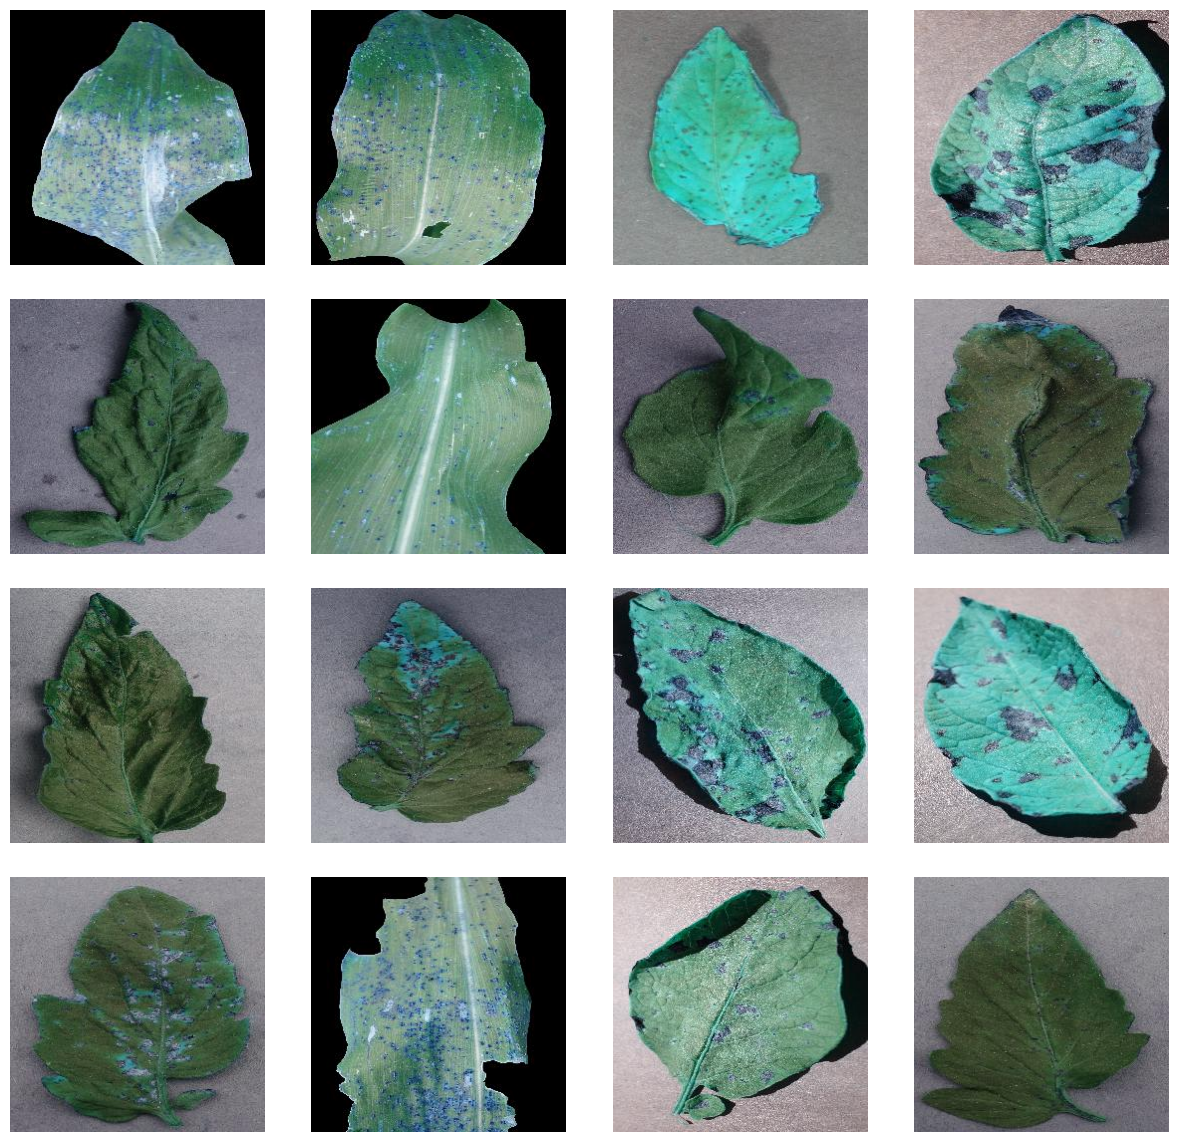

In [11]:
plt.figure(figsize=(12, 12))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = random.choice(image_list)
    plt.imshow(rand_img.astype(np.uint8))
    plt.axis('off')
plt.show()


In [3]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0

# Reshape data to fit the model
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


Training data shape: (720, 256, 256, 3)
Test data shape: (180, 256, 256, 3)


In [4]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))

# Display model summary
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])


C:\Users\Arpit Shet\new_an\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

# Train the model
epochs = 50
batch_size = 128

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_data=(x_val, y_val))


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.3942 - loss: 1.0580 - val_accuracy: 0.6736 - val_loss: 0.9805
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6145 - loss: 0.9688 - val_accuracy: 0.5625 - val_loss: 0.8727
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6093 - loss: 0.8686 - val_accuracy: 0.7986 - val_loss: 0.7968
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8171 - loss: 0.8011 - val_accuracy: 0.6875 - val_loss: 0.7574
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7679 - loss: 0.7520 - val_accuracy: 0.8681 - val_loss: 0.7013
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8672 - loss: 0.7038 - val_accuracy: 0.8403 - val_loss: 0.6762
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8832 - loss: 0.6731 - val_accuracy: 0.8125 - val_loss: 0.6492
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8764 - loss: 0.6321 - val_accuracy: 0.8611 - val_loss: 0.6306
Epoch 9/50
5/

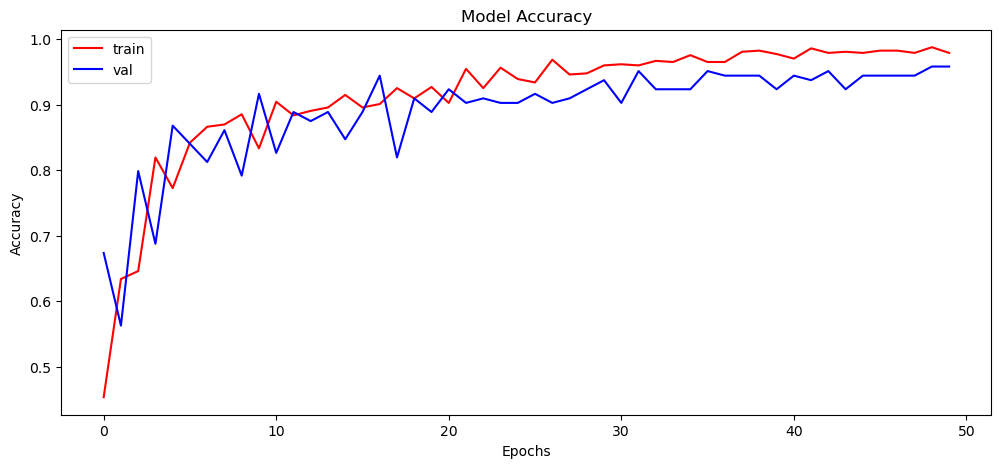

In [7]:
# Save the model to H5 file (legacy format)
model.save("plant_disease.h5")

# Serialize model to JSON
json_model = model.to_json()
with open('plant_model.json', 'w') as json_file:
    json_file.write(json_model)

# Save model weights (ensure the filename ends with `.weights.h5`)
model.save_weights('plant_model.weights.h5')

# Plot training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()


[INFO] Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.9812 - loss: 0.3648
Test Accuracy: 96.67%
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step


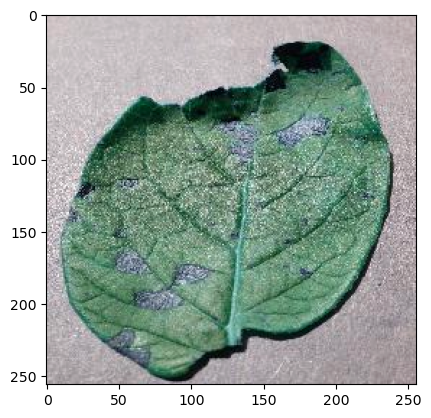

Originally: Potato-Early_blight
Predicted: Potato-Early_blight


In [8]:
# Evaluate the model on the test set
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")

# Predict on test set
y_pred = model.predict(x_test)

# Plot an image and compare predictions
img = array_to_img(x_test[10])
plt.imshow(img)
plt.show()

# Display original and predicted classes
print("Originally:", all_labels[np.argmax(y_test[10])])
print("Predicted:", all_labels[np.argmax(y_pred[10])])


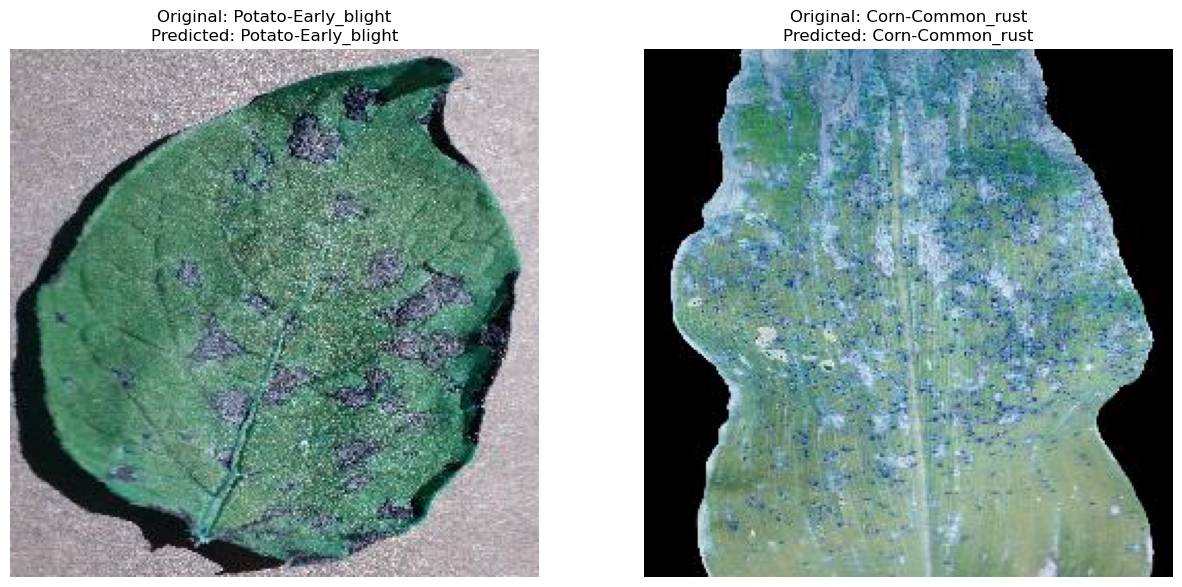

In [10]:
# Number of images to compare
num_images_to_compare = 2

# Plot multiple images and compare predictions
plt.figure(figsize=(15, 10))
for i in range(num_images_to_compare):
    # Select an image from the test set
    img = array_to_img(x_test[i])
    
    # Display the image
    plt.subplot(1, num_images_to_compare, i + 1)
    plt.imshow(img)
    plt.title(f"Original: {all_labels[np.argmax(y_test[i])]}\nPredicted: {all_labels[np.argmax(y_pred[i])]}")
    plt.axis('off')

plt.show()
